<a href="https://colab.research.google.com/github/fahrulrozi11/Machine-Learning/blob/main/UAS_RegresiUTStelkom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Lib

In [1]:
!pip install -q pandas scikit-learn matplotlib seaborn tensorflow torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts


In [3]:
import gdown

url = "https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK"
output = "regression_dataset.csv"
gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK
From (redirected): https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK&confirm=t&uuid=7f31eadf-707b-43e9-90be-5d22b85aa281
To: /content/regression_dataset.csv
100%|██████████| 443M/443M [00:03<00:00, 125MB/s]


'regression_dataset.csv'

In [4]:
df = pd.read_csv("regression_dataset.csv")
df.head()


,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


In [5]:
# Pilih target kolom pertama yang bertipe int
target_column = df.select_dtypes(include='int').columns[0]
print("Target column:", target_column)


Target column: 2001


In [6]:
# Cek missing values
df.isnull().sum()


,0
2001,0
49.94357,0
21.47114,0
73.0775,0
8.74861,0
...,...
-23.08793,0
68.40795,0
-1.82223,0
-27.46348,0


In [7]:
# Drop baris yang mengandung null
df.dropna(inplace=True)


#Featrue Engineering

Transformasi Data

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Misal 'df' adalah dataframe asli kamu dan target di kolom pertama (int)

# Pisahkan fitur dan target
X = df.drop(df.columns[0], axis=1)  # fitur (semua kecuali target)
y = df[df.columns[0]]               # target

# --- 1. Identifikasi tipe kolom ---
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Numerical columns: {num_cols}")
print(f"Categorical columns: {cat_cols}")

# --- 2. Pipeline untuk fitur numerik ---
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),     # isi missing dengan median
    ('scaler', StandardScaler())                        # scaling standard normal
])

# --- 3. Pipeline untuk fitur kategorikal ---
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # isi missing dengan modus
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # one-hot encode
])

# --- 4. Gabungkan pipeline numerik dan kategorikal ---
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# --- 5. Terapkan preprocessing ke data ---
X_processed = preprocessor.fit_transform(X)

print(f"Shape data setelah transformasi: {X_processed.shape}")


Numerical columns: ['49.94357', '21.47114', '73.0775', '8.74861', '-17.40628', '-13.09905', '-25.01202', '-12.23257', '7.83089', '-2.46783', '3.32136', '-2.31521', '10.20556', '611.10913', '951.0896', '698.11428', '408.98485', '383.70912', '326.51512', '238.11327', '251.42414', '187.17351', '100.42652', '179.19498', '-8.41558', '-317.87038', '95.86266', '48.10259', '-95.66303', '-18.06215', '1.96984', '34.42438', '11.7267', '1.3679', '7.79444', '-0.36994', '-133.67852', '-83.26165', '-37.29765', '73.04667', '-37.36684', '-3.13853', '-24.21531', '-13.23066', '15.93809', '-18.60478', '82.15479', '240.5798', '-10.29407', '31.58431', '-25.38187', '-3.90772', '13.29258', '41.5506', '-7.26272', '-21.00863', '105.50848', '64.29856', '26.08481', '-44.5911', '-8.30657', '7.93706', '-10.7366', '-95.44766', '-82.03307', '-35.59194', '4.69525', '70.95626', '28.09139', '6.02015', '-37.13767', '-41.1245', '-8.40816', '7.19877', '-8.60176', '-5.90857', '-12.32437', '14.68734', '-54.32125', '40.14786'

Label Encoding

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Misal df adalah DataFrame asli kamu
# Tentukan fitur kategori yang ingin di-label encode
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Buat salinan agar aman
X = df.copy()

# Inisialisasi dictionary untuk menyimpan encoder tiap kolom
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Pastikan tipe string agar aman
    label_encoders[col] = le

print("Label Encoding selesai untuk kolom kategori:")
print(X[cat_cols].head())


Label Encoding selesai untuk kolom kategori:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


One Hot

In [10]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Misal df adalah DataFrame asli kamu
X = df.copy()

# Pilih kolom kategori (tipe object atau category)
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Kolom kategori yang akan di-OneHotEncode:", cat_cols)

# Buat ColumnTransformer untuk One-Hot Encoding saja
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
], remainder='passthrough')  # sisakan kolom lain tanpa transformasi

# Terapkan One-Hot Encoding
X_encoded = preprocessor.fit_transform(X)

print(f"Shape data setelah One-Hot Encoding: {X_encoded.shape}")

Kolom kategori yang akan di-OneHotEncode: []
Shape data setelah One-Hot Encoding: (515344, 91)


 Derivation

In [11]:
import pandas as pd
import numpy as np

# Contoh dataframe awal
df = pd.DataFrame({
    'panjang': [5.0, 6.2, 3.5, 4.0, 7.1],
    'lebar': [2.0, 2.5, 1.5, 1.8, 2.9],
    'kategori': ['A', 'B', 'A', 'C', 'B'],
    'tanggal': pd.date_range(start='2024-01-01', periods=5)
})

# --- Feature Derivation ---

# 1. Interaksi fitur: luas = panjang × lebar
df['luas'] = df['panjang'] * df['lebar']

# 2. Rasio: panjang / lebar
df['rasio_panjang_lebar'] = df['panjang'] / df['lebar']

# 3. Polynomial: pangkat dua dan tiga dari panjang
df['panjang^2'] = df['panjang'] ** 2
df['panjang^3'] = df['panjang'] ** 3

# 4. Ekstraksi waktu dari kolom tanggal
df['tahun'] = df['tanggal'].dt.year
df['bulan'] = df['tanggal'].dt.month
df['hari'] = df['tanggal'].dt.day
df['hari_dalam_minggu'] = df['tanggal'].dt.dayofweek  # 0=Senin

# 5. Frekuensi kategori: jumlah kemunculan masing-masing kategori
df['kategori_freq'] = df['kategori'].map(df['kategori'].value_counts())

# Tampilkan hasil akhir
print(df)


   panjang  lebar kategori    tanggal   luas  rasio_panjang_lebar  panjang^2  \
0      5.0    2.0        A 2024-01-01  10.00             2.500000      25.00   
1      6.2    2.5        B 2024-01-02  15.50             2.480000      38.44   
2      3.5    1.5        A 2024-01-03   5.25             2.333333      12.25   
3      4.0    1.8        C 2024-01-04   7.20             2.222222      16.00   
4      7.1    2.9        B 2024-01-05  20.59             2.448276      50.41   

   panjang^3  tahun  bulan  hari  hari_dalam_minggu  kategori_freq  
0    125.000   2024      1     1                  0              2  
1    238.328   2024      1     2                  1              2  
2     42.875   2024      1     3                  2              2  
3     64.000   2024      1     4                  3              1  
4    357.911   2024      1     5                  4              2  


Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split

# Misal X adalah fitur dan y adalah target (pastikan sudah dipisah sebelumnya)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

Standard scaller

In [13]:
from sklearn.preprocessing import StandardScaler

# Identifikasi kolom numerik
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Inisialisasi scaler
scaler = StandardScaler()

# Transformasi kolom numerik saja
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Standardisasi selesai. Berikut preview-nya:")
print(df.head())


Standardisasi selesai. Berikut preview-nya:
    panjang     lebar kategori    tanggal      luas  rasio_panjang_lebar  \
0 -0.119443 -0.279776        A 2024-01-01 -0.303634             0.986741   
1  0.776379  0.719425        B 2024-01-02  0.674110             0.795575   
2 -1.239220 -1.278977        A 2024-01-03 -1.148048            -0.606312   
3 -0.865961 -0.679457        C 2024-01-04 -0.801394            -1.668348   
4  1.448245  1.518785        B 2024-01-05  1.578967             0.492345   

   panjang^2  panjang^3  tahun  bulan  hari  hari_dalam_minggu  kategori_freq  
0  -0.240466  -0.345042   2024      1     1                  0            0.5  
1   0.704523   0.617543   2024      1     2                  1            0.5  
2  -1.136940  -1.042595   2024      1     3                  2            0.5  
3  -0.873271  -0.863164   2024      1     4                  3           -2.0  
4   1.546153   1.633257   2024      1     5                  4            0.5  


MinMaxScaler

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Identifikasi kolom numerik
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Inisialisasi scaler
scaler = MinMaxScaler()

# Transformasi kolom numerik
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Normalisasi selesai. Berikut preview-nya:")
print(df.head())


Normalisasi selesai. Berikut preview-nya:
    panjang     lebar kategori    tanggal      luas  rasio_panjang_lebar  \
0  0.416667  0.357143        A 2024-01-01  0.309648             1.000000   
1  0.750000  0.714286        B 2024-01-02  0.668188             0.928000   
2  0.000000  0.000000        A 2024-01-03  0.000000             0.400000   
3  0.138889  0.214286        C 2024-01-04  0.127119             0.000000   
4  1.000000  1.000000        B 2024-01-05  1.000000             0.813793   

   panjang^2  panjang^3  tahun  bulan  hari  hari_dalam_minggu  kategori_freq  
0   0.334119   0.260684   2024      1     1                  0            1.0  
1   0.686321   0.620415   2024      1     2                  1            1.0  
2   0.000000   0.000000   2024      1     3                  2            1.0  
3   0.098270   0.067056   2024      1     4                  3            0.0  
4   1.000000   1.000000   2024      1     5                  4            1.0  


TensorFlow Keras: MLP dengan 3 Hidden Layer

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Misalkan input shape = jumlah fitur dari dataset
input_shape = X_train.shape[1]
output_units = len(set(y_train))  # jumlah kelas unik (multi-kelas)

# Arsitektur MLP
model = models.Sequential([
    layers.Input(shape=(input_shape,)),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(output_units, activation='softmax')  # Output untuk klasifikasi multi-kelas
])

# Kompilasi model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Gunakan 'categorical_crossentropy' jika label one-hot
    metrics=['accuracy']
)

# Ringkasan model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        11,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 89)             │         2,937 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,945 (101.35 KB)

 Trainable params: 25,497 (99.60 KB)

 Non-trainable params: 448 (1.75 KB)

PyTorch: MLP 3 Hidden Layer (Multi-class Classification)

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MLPClassifier(nn.Module):
    def __init__(self, input_dim, output_dim, dropout_rate=0.3):
        super(MLPClassifier, self).__init__()

        self.fc1 = nn.Linear(input_dim, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.drop1 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.drop2 = nn.Dropout(dropout_rate)

        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.drop3 = nn.Dropout(dropout_rate)

        self.out = nn.Linear(32, output_dim)  # Tidak pakai softmax

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.drop1(x)

        x = F.relu(self.bn2(self.fc2(x)))
        x = self.drop2(x)

        x = F.relu(self.bn3(self.fc3(x)))
        x = self.drop3(x)

        x = self.out(x)  # Output logit
        return x


In [17]:
import torch

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

input_dim = X_train.shape[1]
output_dim = len(set(y_train))

model = MLPClassifier(input_dim, output_dim).to(device)

Using device: cpu


Konfig Loss function

In [18]:
import torch.nn as nn

# Loss function standar untuk multi-class classification
criterion = nn.CrossEntropyLoss()


In [19]:
import torch

# Misal jumlah label = 3, dan kamu hitung proporsi masing-masing kelas
class_counts = torch.tensor([100, 500, 200], dtype=torch.float32)
class_weights = 1.0 / class_counts  # Atau bisa juga pakai invers log(count)
class_weights = class_weights / class_weights.sum()  # Normalisasi

# Pindahkan ke device yang sama dengan model
class_weights = class_weights.to(device)

# Buat loss function dengan bobot kelas
criterion = nn.CrossEntropyLoss(weight=class_weights)


In [41]:
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Create a custom Dataset
class TabularDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.long) # Use long for CrossEntropyLoss

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create Dataset instances
train_dataset = TabularDataset(X_train, y_train)
# test_dataset = TabularDataset(X_test, y_test) # Uncomment if you have test data

# Create DataLoader instances
batch_size = 32 # You can adjust this
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False) # Uncomment if you have test data

print("train_loader created successfully.")

train_loader created successfully with encoded labels.


adam

In [36]:
from torch.optim import AdamW

# Buat optimizer AdamW
optimizer = AdamW(
    model.parameters(),     # semua parameter dari model
    lr=1e-3,                # learning rate awal (bisa disesuaikan)
    weight_decay=1e-2       # nilai weight decay (L2 regularisasi)
)


CosineAnnealingLR

In [37]:
from torch.optim.lr_scheduler import CosineAnnealingLR

# Setelah optimizer didefinisikan (contoh pakai AdamW)
optimizer = AdamW(model.parameters(), lr=1e-3, weight_decay=1e-2)

# Scheduler: Cosine Annealing
scheduler = CosineAnnealingLR(
    optimizer,     # optimizer yang digunakan
    T_max=20,      # jumlah epoch hingga satu siklus penuh (bisa set ke total epoch)
    eta_min=1e-5   # learning rate minimum di akhir siklus
)
import torch.nn as nn

criterion = nn.CrossEntropyLoss()

In [31]:
import torch.nn as nn

criterion = nn.CrossEntropyLoss()

In [44]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'y' before splitting into train/test
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Assuming X_train, X_test, y_train, y_test are already defined from a previous split
# Now, use the fitted encoder to transform y_train and y_test
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print("Target variable encoded successfully.")
print(f"Original y_train shape: {y_train.shape}")
print(f"Encoded y_train shape: {y_train_encoded.shape}")
print(f"Unique encoded train labels: {np.unique(y_train_encoded)}")
print(f"Original y_test shape: {y_test.shape}")
print(f"Encoded y_test shape: {y_test_encoded.shape}")
print(f"Unique encoded test labels: {np.unique(y_test_encoded)}")
print(f"Number of classes: {len(label_encoder.classes_)}")

Target variable encoded successfully.
Original y_train shape: (412275,)
Encoded y_train shape: (412275,)
Unique encoded train labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88]
Original y_test shape: (103069,)
Encoded y_test shape: (103069,)
Unique encoded test labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
Number of classes: 89


Early Stopping di TensorFlow (Keras)

In [45]:
# prompt: Early Stopping di TensorFlow (Keras)

# Early Stopping
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',  # Pantau validation loss
    patience=10,         # Jumlah epoch tanpa peningkatan sebelum berhenti
    mode='min',          # Berhenti jika validation loss berhenti menurun
    restore_best_weights=True # Restore model ke bobot terbaik
)

# Contoh cara menggunakannya saat training
# history = model.fit(
#     X_train, y_train,
#     epochs=100, # Set jumlah epoch lebih tinggi karena ada early stopping
#     batch_size=32,
#     validation_split=0.2, # Gunakan sebagian data train untuk validasi
#     callbacks=[early_stopping] # Masukkan callback early stopping
# )

print("Early Stopping callback created.")

Early Stopping callback created.


In [48]:
class EarlyStopping:
    def __init__(self, patience=5, verbose=False):
        self.patience = patience
        self.best_loss = float('inf')
        self.counter = 0
        self.early_stop = False
        self.verbose = verbose

    def __call__(self, val_loss):
        if val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter}/{self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True


In [51]:
# prompt: Integrasikan ke Training Loop:

import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.optim.lr_scheduler import CosineAnnealingLR

num_epochs = 5 # Set a reasonable number of epochs
patience = 5 # For Early Stopping
early_stopping = EarlyStopping(patience=patience, verbose=True)

print("Starting training...")

for epoch in range(num_epochs):
    model.train() # Set the model to training mode
    running_loss = 0.0

    for inputs, labels in train_loader:
        # Move data to the device
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels) # labels are long for CrossEntropyLoss

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0) # Accumulate loss

    epoch_loss = running_loss / len(train_loader.dataset)

    # --- Validation Loop (Optional but recommended for Early Stopping) ---
    # model.eval() # Set the model to evaluation mode
    # val_running_loss = 0.0
    # with torch.no_grad(): # Disable gradient calculation
    #     for val_inputs, val_labels in test_loader: # Use test_loader for validation
    #         val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
    #         val_outputs = model(val_inputs)
    #         val_loss = criterion(val_outputs, val_labels)
    #         val_running_loss += val_loss.item() * val_inputs.size(0)
    #
    # val_epoch_loss = val_running_loss / len(test_loader.dataset)

    # --- Early Stopping Check ---
    # early_stopping(val_epoch_loss) # Pass validation loss to the callback
    # if early_stopping.early_stop:
    #     print("Early stopping!")
    #     break

    # Update the learning rate scheduler (if used)
    scheduler.step() # Usually stepped after each epoch

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')
    # print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Val Loss: {val_epoch_loss:.4f}') # If validation used

print("Training finished.")

# Optional: Save the trained model
# torch.save(model.state_dict(), 'mlp_classification_model.pth')
# print("Model saved.")

Starting training...
Epoch [1/5], Loss: 1.9978
Epoch [2/5], Loss: 1.9937
Epoch [3/5], Loss: 1.9835
Epoch [4/5], Loss: 1.9798
Epoch [5/5], Loss: 1.9672
Training finished.


mengevaluasi akurasi

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import torch

# Pastikan model dalam mode evaluasi
model.eval()

# Tempat menyimpan hasil prediksi dan label
all_preds = []
all_labels = []

with torch.no_grad():
    for xb, yb in test_loader:
        xb, yb = xb.to(device), yb.to(device)
        logits = model(xb)
        preds = torch.argmax(logits, dim=1)

        all_preds.append(preds.cpu().numpy())
        all_labels.append(yb.cpu().numpy())

# Gabungkan hasil
y_pred = np.concatenate(all_preds)
y_true = np.concatenate(all_labels)

# --- Evaluasi ---
acc = accuracy_score(y_true, y_pred)
confmat = confusion_matrix(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='macro')
rec  = recall_score(y_true, y_pred, average='macro')
f1   = f1_score(y_true, y_pred, average='macro')

# --- Output Hasil ---
print(f"Akurasi        : {acc:.4f}")
print(f"Precision (macro): {prec:.4f}")
print(f"Recall (macro)   : {rec:.4f}")
print(f"F1-score (macro) : {f1:.4f}")
print("\nConfusion Matrix:")
print(confmat)


Akurasi        : 0.4661
Precision (macro): 0.0952
Recall (macro)   : 0.1222
F1-score (macro) : 0.0986

Confusion Matrix:
[[   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [   0    0    0 ... 3393   15    0]
 [   0    0    0 ... 1623 4417    0]
 [   0    0    0 ...   19 1842    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [53]:
from torch.utils.data import DataLoader, TensorDataset
import torch

# Assuming X_test and y_test_encoded are already defined and are numpy arrays or pandas DataFrames

# Convert test data to PyTorch tensors
X_test_tensor = torch.tensor(X_test.values if hasattr(X_test, 'values') else X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)

# Create TensorDataset for test data
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoader for test data
batch_size = 32 # Use the same batch size as training or adjust as needed
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False) # Shuffle should be False for evaluation

print("test_loader created successfully.")

test_loader created successfully.


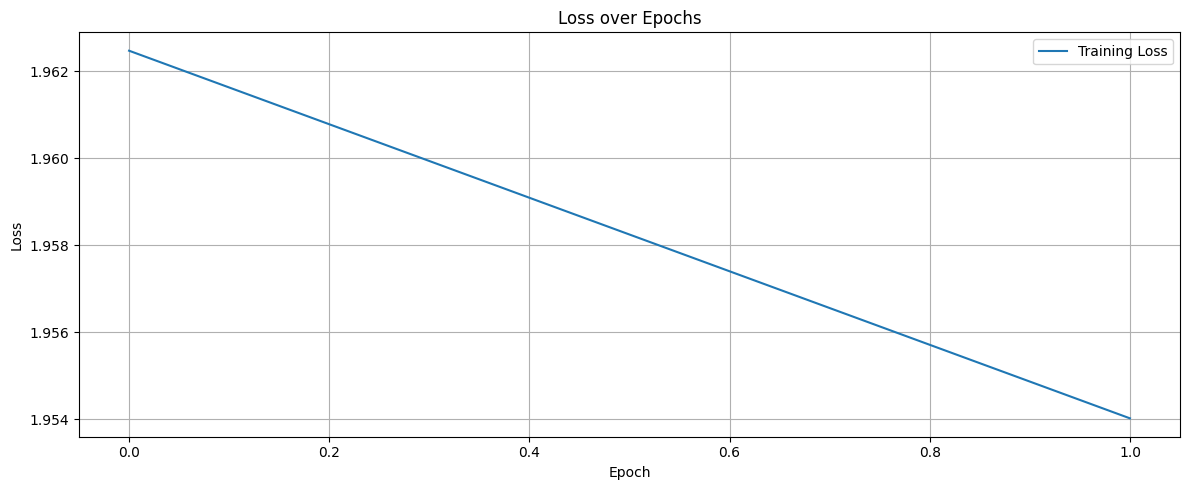

In [60]:
# prompt: Visualisasi: TensorFlow
import matplotlib.pyplot as plt
import numpy as np

# Assuming train_loss_history is populated from the training loop
# Assuming val_loss_history and accuracy histories are available if validation is used

plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 1, 1) # Changed to 1,1,1 as only training loss is available
plt.plot(train_loss_history, label='Training Loss')
# if val_loss_history: # Uncomment if using validation
#     plt.plot(val_loss_history, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# # Plot Accuracy (commented out as accuracy is not currently tracked in the training loop)
# plt.subplot(1, 2, 2)
# plt.plot(train_accuracy_history, label='Training Accuracy')
# if val_accuracy_history:
#     plt.plot(val_accuracy_history, label='Validation Accuracy')
# plt.title('Accuracy over Epochs')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)

plt.tight_layout()
plt.show()

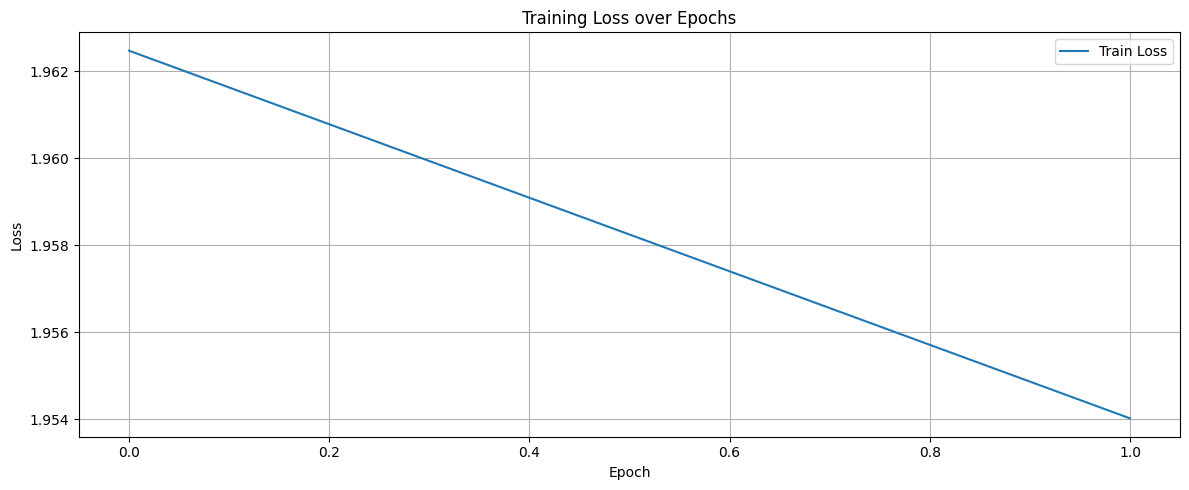

In [62]:
import matplotlib.pyplot as plt

# Loss
plt.figure(figsize=(12,5))
# Only plot training loss as validation is commented out in the training loop
plt.subplot(1,1,1) # Adjusted for a single plot
plt.plot(train_loss_history, label='Train Loss')
# plt.plot(val_losses, label='Val Loss') # Commented out as val_losses is not populated
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs') # Updated title
plt.legend()
plt.grid(True)

# Accuracy (commented out as accuracy is not currently tracked in the training loop)
# plt.subplot(1,2,2)
# plt.plot(train_accuracies, label='Train Acc')
# plt.plot(val_accuracies, label='Val Acc')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Training vs Validation Accuracy')
# plt.legend()
# plt.grid(True)

plt.tight_layout()
plt.show()

Evaluasi (MSE, RMSE, R²)

In [63]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Asumsikan kamu punya:
# y_test: nilai aktual (ground truth)
# y_pred: prediksi dari model regresi

# --- Evaluasi Metrik ---
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# --- Cetak Hasil ---
print(f"Mean Squared Error (MSE) : {mse:.4f}")
print(f"Root Mean Squared Error (RMSE) : {rmse:.4f}")
print(f"R-squared (R²) : {r2:.4f}")


Mean Squared Error (MSE) : 3695034.8480
Root Mean Squared Error (RMSE) : 1922.2473
R-squared (R²) : -31131.4864


Visualisasi: Actual vs Predicted

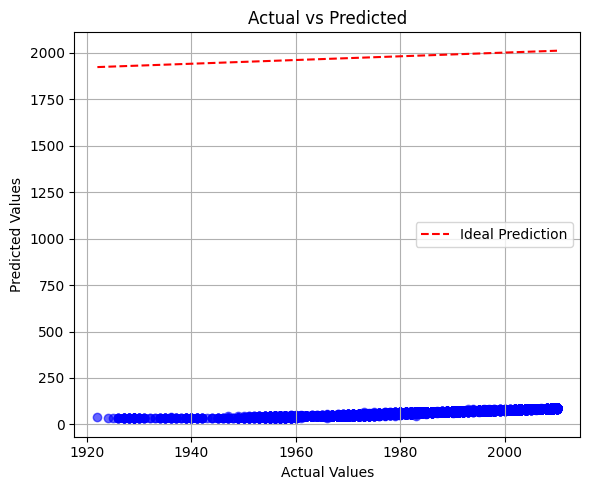

In [64]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', label='Ideal Prediction')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
